In [1]:
#importing dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

import os

## Training and Testing data

In [2]:
#Training data
X_train = pd.read_csv("Dataset/Train/X_train.txt", sep = " ", header = None)
y_train = pd.read_csv("Dataset/Train/y_train.txt", sep = " ", header = None)

#Testing data
X_test = pd.read_csv("Dataset/Test/X_test.txt", sep = " ", header = None)
y_test = pd.read_csv("Dataset/Test/y_test.txt", sep = " ", header = None)

#activity labels
y_labels = pd.read_csv("Dataset/activity_labels.txt", header = None)

#feature labels
features = pd.read_csv("Dataset/features.txt", header = None)

In [3]:
X_train.shape

(7767, 561)

In [4]:
X_test.shape

(3162, 561)

In [5]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [6]:
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


## Actual Raw data from 30 different phones

In [7]:
# #User 01 accelerometer and gyroscope data

# acc_user01 = pd.read_csv("Dataset/RawData/acc_exp01_user01.txt", sep = " ", header = None)
# gyro_user01 = pd.read_csv("Dataset/RawData/gyro_exp01_user01.txt", sep = " ", header = None)

# acc_user01.shape


In [8]:
# gyro_user01.shape


## Multiple linear regression

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
#Calculating the scores for the training and testing data
print (f"Training R2 Score: {model.score(X_train, y_train)}")
print (f"Testing R2 Score: {model.score(X_test, y_test)}")

Training R2 Score: 0.9412074224369081
Testing R2 Score: 0.8994273427877254


In [12]:
y_test.head()

,0
0,5
1,5
2,5
3,5
4,5


In [13]:
predictions = model.predict(X_test)
predictions[:5]

array([[5.77077614],
       [4.61877565],
       [4.55831322],
       [4.9585298 ],
       [5.10304631]])

Text(0.5, 1.0, 'Residual Plot')

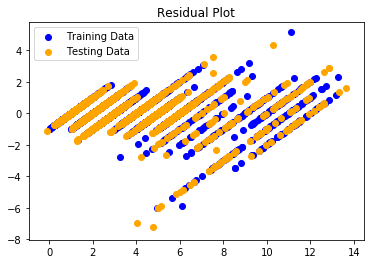

In [14]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")

#### Apparently it doesn't work with categorical labels. so this is not the model we're looking for.

SVM(Ignore this procedure, it is for two group classification)

In [15]:
from matplotlib import style
style.use("ggplot")

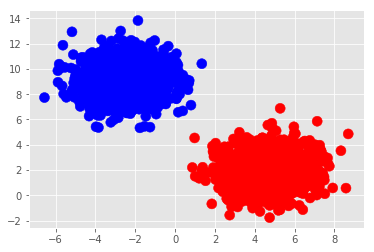

In [31]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=2000, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [32]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

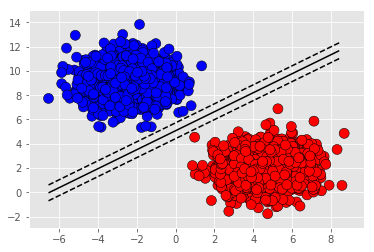

In [33]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

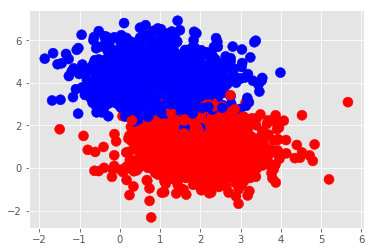

In [34]:
#Validation
X, y = make_blobs(n_samples=2000, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [35]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

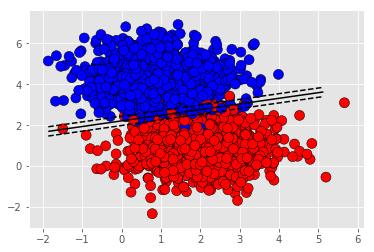

In [37]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [38]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.97      0.98      0.97       253
         red       0.98      0.97      0.97       247

   micro avg       0.97      0.97      0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
#https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape/53723929

# Convert the dataframe to a numpy array for Keras
# X_train = X_train.values(the given dataset was already an array, so I didnt need to call .value.)
X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))


In [41]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.958
k: 201, Train/Test Score: 0.974/0.976
k: 401, Train/Test Score: 0.973/0.976
k: 601, Train/Test Score: 0.972/0.974
k: 801, Train/Test Score: 0.971/0.972
k: 1001, Train/Test Score: 0.971/0.974
k: 1201, Train/Test Score: 0.972/0.974
k: 1401, Train/Test Score: 0.974/0.968


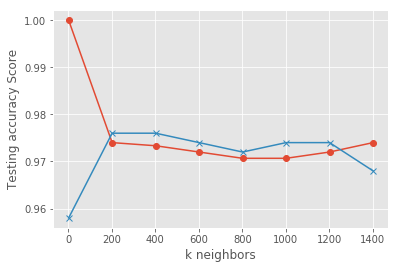

In [44]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 1500, 200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 1500, 200), train_scores, marker='o')
plt.plot(range(1, 1500, 200), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 1, Train/Test Score: 1.000/0.958
k: 51, Train/Test Score: 0.972/0.972
k: 101, Train/Test Score: 0.973/0.972
k: 151, Train/Test Score: 0.974/0.974
k: 201, Train/Test Score: 0.974/0.976
k: 251, Train/Test Score: 0.974/0.974
k: 301, Train/Test Score: 0.974/0.974
k: 351, Train/Test Score: 0.972/0.976
k: 401, Train/Test Score: 0.973/0.976
k: 451, Train/Test Score: 0.973/0.974
k: 501, Train/Test Score: 0.972/0.974
k: 551, Train/Test Score: 0.971/0.974
k: 601, Train/Test Score: 0.972/0.974
k: 651, Train/Test Score: 0.971/0.972
k: 701, Train/Test Score: 0.971/0.974
k: 751, Train/Test Score: 0.971/0.974
k: 801, Train/Test Score: 0.971/0.972
k: 851, Train/Test Score: 0.971/0.974
k: 901, Train/Test Score: 0.971/0.974
k: 951, Train/Test Score: 0.971/0.974


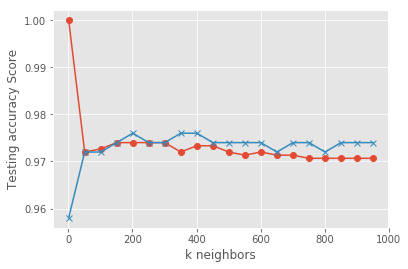

In [45]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 1000, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 1000, 50), train_scores, marker='o')
plt.plot(range(1, 1000, 50), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 1, Train/Test Score: 1.000/0.958
k: 21, Train/Test Score: 0.972/0.972
k: 41, Train/Test Score: 0.972/0.970
k: 61, Train/Test Score: 0.973/0.974
k: 81, Train/Test Score: 0.973/0.970
k: 101, Train/Test Score: 0.973/0.972
k: 121, Train/Test Score: 0.975/0.970
k: 141, Train/Test Score: 0.973/0.972
k: 161, Train/Test Score: 0.974/0.972
k: 181, Train/Test Score: 0.974/0.974


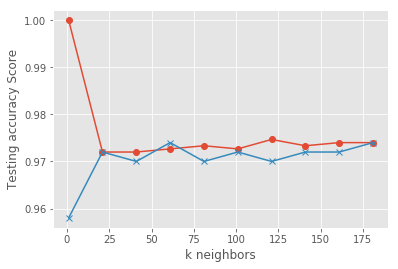

In [46]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 200, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 200, 20), train_scores, marker='o')
plt.plot(range(1, 200, 20), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 50, Train/Test Score: 0.971/0.970
k: 55, Train/Test Score: 0.972/0.974
k: 60, Train/Test Score: 0.972/0.972
k: 65, Train/Test Score: 0.971/0.972
k: 70, Train/Test Score: 0.974/0.970
k: 75, Train/Test Score: 0.975/0.970
k: 80, Train/Test Score: 0.974/0.970
k: 85, Train/Test Score: 0.973/0.972
k: 90, Train/Test Score: 0.972/0.970
k: 95, Train/Test Score: 0.973/0.972
k: 100, Train/Test Score: 0.973/0.972
k: 105, Train/Test Score: 0.973/0.970
k: 110, Train/Test Score: 0.973/0.970
k: 115, Train/Test Score: 0.973/0.968
k: 120, Train/Test Score: 0.974/0.970


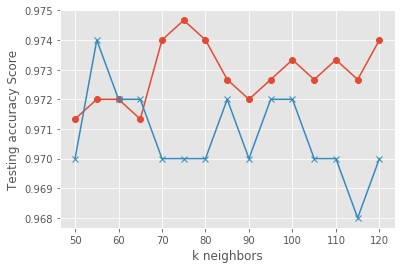

In [47]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(50, 125, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(50, 125, 5), train_scores, marker='o')
plt.plot(range(50, 125, 5), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 50, Train/Test Score: 0.971/0.970
k: 51, Train/Test Score: 0.972/0.972
k: 52, Train/Test Score: 0.971/0.970
k: 53, Train/Test Score: 0.972/0.970
k: 54, Train/Test Score: 0.973/0.972
k: 55, Train/Test Score: 0.972/0.974
k: 56, Train/Test Score: 0.972/0.972
k: 57, Train/Test Score: 0.972/0.972
k: 58, Train/Test Score: 0.973/0.972
k: 59, Train/Test Score: 0.973/0.974
k: 60, Train/Test Score: 0.972/0.972
k: 61, Train/Test Score: 0.973/0.974
k: 62, Train/Test Score: 0.971/0.972
k: 63, Train/Test Score: 0.971/0.974
k: 64, Train/Test Score: 0.972/0.970


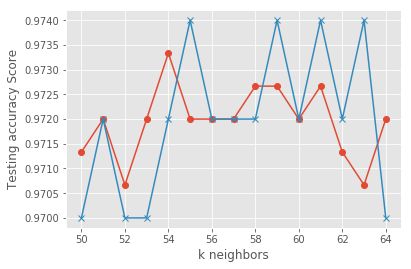

In [48]:
train_scores = []
test_scores = []
for k in range(50, 65, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(50, 65, 1), train_scores, marker='o')
plt.plot(range(50, 65, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Optimized k=57, 58

In [52]:
# Note that k: 58 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=56)
knn.fit(X_train, y_train)
print('k=56 Test Acc: %.3f' % knn.score(X_test, y_test))

k=56 Test Acc: 0.972


In [53]:
knn = KNeighborsClassifier(n_neighbors=57)
knn.fit(X_train, y_train)
print('k=57 Test Acc: %.3f' % knn.score(X_test, y_test))

k=57 Test Acc: 0.972
